# MNIST mit veränderter Modell-Architektur - v.3
Source: https://www.kaggle.com/code/sagorkumarmitra/task-1-creating-a-neural-network-mnist

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam ,RMSprop
import seaborn as sns
import visualkeras
from keras.utils import plot_model

## Einladen des MNIST-Datensatzes, aufteilen und Beispiel anzeigen

In [2]:
# Datensatz angeben
data = keras.datasets.mnist

# Datensatz herunterladen, Aufteilen der Daten in Test- und Trainingsdaten
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [3]:
# Größe der Trainingsdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print('Training-Datensatz: ', train_images.shape)
# Größe der Testdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print('Test-Datensatz: ', test_images.shape)
# Informationsinhalte der Daten
print(f"Pixelwerte von {np.min(train_images)} bis {np.max(train_images)}.")

Training-Datensatz:  (60000, 28, 28)
Test-Datensatz:  (10000, 28, 28)
Pixelwerte von 0 bis 255.


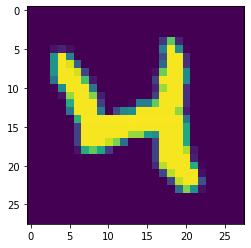

In [4]:
single_image = train_images[20]
plt.imshow(single_image)

## Preprocessing - Umwandlung der Lablels in einen Vektor mit 10 Elementen

In [5]:
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(train_labels)
y_example[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
labels_cat_test = to_categorical(test_labels,10)
labels_cat_train = to_categorical(train_labels,10)

## Skalieren der Bilder auf Werteberich zwischen 0 und 1

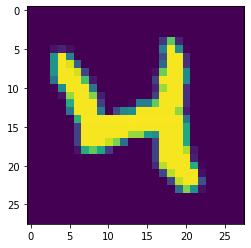

In [7]:
train_images = train_images/255
test_images = test_images/255
plt.imshow(train_images[20])

## Reshaping der Datensätze (Train, Test), Erweiterung um eine Dimension

In [8]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000,28,28,1)
test_images.shape

(10000, 28, 28, 1)

## Modellaufbau

In [9]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# KERAS METRICS FOR REPORT GENERATION
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

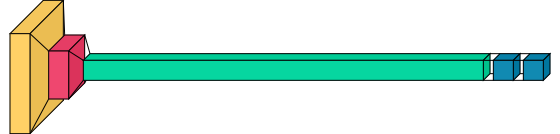

In [29]:
visualkeras.layered_view(model)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

 Das Training wird automatisch gestoppt, wenn der Validierungsverlust für zwei aufeinanderfolgende Epochen nicht verbessert wird. Dies hilft, Überanpassung zu vermeiden und das Training zu beenden, wenn das Modell nicht mehr von den Daten lernt.

* monitor='val_loss': Der Monitor gibt an, welche Metrik überwacht werden soll, um zu entscheiden, wann das Training beendet werden soll. In diesem Fall ist es der Validierungsverlust (val_loss). Das Training wird gestoppt, wenn der Validierungsverlust nicht mehr verbessert wird.

* patience=2: Die Geduld gibt an, wie viele Epochen ohne Verbesserung der überwachten Metrik toleriert werden, bevor das Training gestoppt wird. In diesem Beispiel wird das Training beendet, wenn der Validierungsverlust für zwei aufeinanderfolgende Epochen nicht verbessert wird.

## Modellierung

val_loss und val_accuracy sind Metriken, die verwendet werden, um die Leistung eines neuronalen Netzwerks während des Validierungsprozesses zu bewerten.

* val_loss (Validierungsverlust):
Der Validierungsverlust ist eine Kennzahl, die angibt, wie gut das Modell auf einem separaten Validierungsdatensatz performt. Der Verlust misst die Differenz zwischen den vorhergesagten Werten des Modells und den tatsächlichen Werten im Validierungsdatensatz. Ein niedriger Validierungsverlust deutet darauf hin, dass das Modell gut auf Daten generalisiert, die es nicht während des Trainings gesehen hat. Die Verlustfunktion, die während des Trainings minimiert wird (z. B. Kreuzentropie oder quadratischer Fehler), wird auch auf dem Validierungsdatensatz angewendet.

* val_accuracy (Validierungsgenauigkeit):
Die Validierungsgenauigkeit gibt den Prozentsatz der korrekt klassifizierten Instanzen im Validierungsdatensatz an. Es misst also, wie gut das Modell die Klassen im Validierungsdatensatz vorhersagt. Eine höhere Validierungsgenauigkeit deutet darauf hin, dass das Modell gut generalisiert und in der Lage ist, nicht gesehene Daten korrekt zu klassifizieren.

Während des Trainings eines neuronalen Netzwerks werden normalerweise sowohl der Trainingsverlust (loss) als auch die Trainingsgenauigkeit (accuracy) überwacht, um die Leistung während des Lernprozesses zu überprüfen. Der Validierungsverlust und die Validierungsgenauigkeit helfen dabei, Überanpassung (Overfitting) zu überwachen und sicherzustellen, dass das Modell nicht nur auf die Trainingsdaten, sondern auch auf neue Daten gut generalisiert.

In [12]:
model.fit(train_images,labels_cat_train,epochs=10,validation_data=(test_images,labels_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1437 - accuracy: 0.9578 - val_loss: 0.0730 - val_accuracy: 0.9770
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.0428 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0448 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0379 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0361 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0401 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0393 -

## Modellevaluierung

In [13]:
model.metrics_names

['loss', 'accuracy']

In [14]:
losses = pd.DataFrame(model.history.history)
losses.head(6)

,loss,accuracy,val_loss,val_accuracy
0,0.143668,0.957833,0.072967,0.9770
1,0.049962,0.984800,0.042823,0.9853
2,0.032173,0.989833,0.044805,0.9843
3,0.021810,0.993233,0.037887,0.9878
4,0.014898,0.995350,0.036061,0.9887
5,0.011889,0.996083,0.040101,0.9885


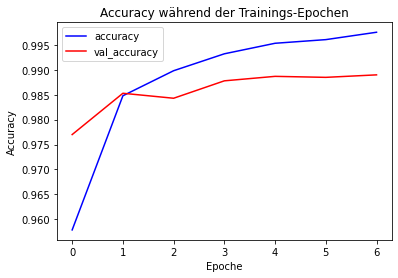

In [15]:
plt.plot(losses['accuracy'], color='b',  label='accuracy')
plt.plot(losses['val_accuracy'], color='r', label='val_accuracy')
plt.title("Accuracy während der Trainings-Epochen")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

313/313 [==============================] - 2s 6ms/step


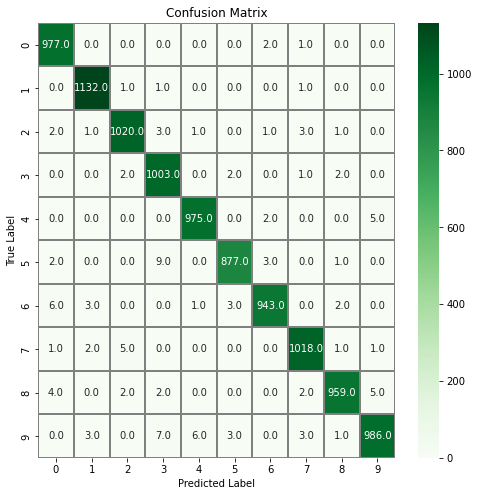

In [16]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_pred_classes
cm=confusion_matrix(test_labels,y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

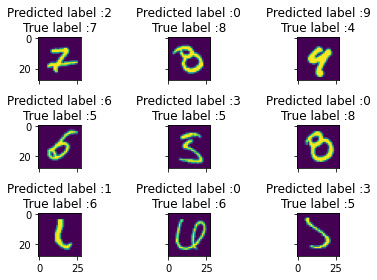

In [17]:
# Fehler sind Unterschiede zwischen y_pred labels and den wahren labels
errors = (y_pred_classes - test_labels != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
test_labels_errors = test_labels[errors]
test_images_errors = test_images[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):

    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    fig.tight_layout()

# Wahrscheinlichkeit der falsch erkannten Zahl
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Vorhergesagte Wahrscheinlichkeit der wahren Zahl
true_prob_errors = np.diagonal(np.take(y_pred_errors, test_labels_errors, axis=1))

# Differenz der Wahrscheinlichkeiten
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sortieren der Differenzen
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 9 auswählen
most_important_errors = sorted_delta_errors[-9:]
display_errors(most_important_errors, test_images_errors, y_pred_classes_errors, test_labels_errors)

## Damit kann man leben...

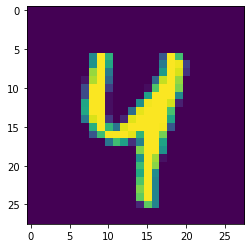

In [24]:
my_number = test_images[42]
plt.imshow(my_number.reshape(28,28))

In [25]:
predict_x=model.predict(my_number.reshape(1,28,28,1))
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 28ms/step


In [27]:
classes_x

array([4], dtype=int64)